In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
!pip install xgboost
!pip install imbalanced-learn


In [3]:
df = pd.read_csv("F:\DataEngineer\dataset\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

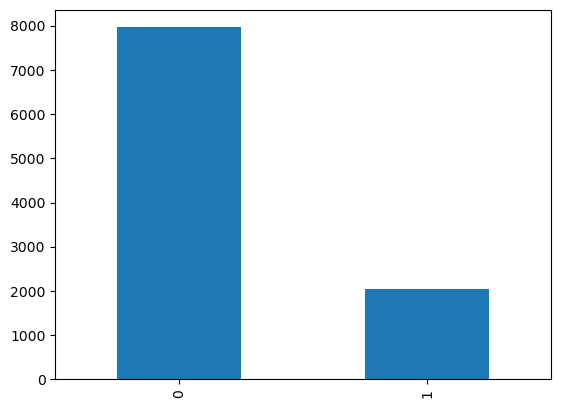

In [4]:
df['Exited'].value_counts().plot(kind="bar")

In [5]:
#train model 
df= df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [6]:
#onehot
df_dummy = pd.get_dummies(df,drop_first=True)

In [7]:
df_dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [8]:
X= df_dummy.drop(['Exited'],axis=1)
y = df_dummy['Exited']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


MinMaxScaler()

In [11]:
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]  = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] )

In [12]:
#performance evaluation
def print_score(y_true,y_pred):
    print(classification_report(y_true,y_pred))

In [13]:
#train model with imbalance dataset
#initialize
model = LogisticRegression()
#fit with train data
model.fit(X_train, y_train)
#predict with test data
y_pred = model.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [14]:
#class weight
model = LogisticRegression(class_weight="balanced")
#fit with train data
model.fit(X_train, y_train)
#predict with test data
y_pred = model.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



In [15]:
#random forest
from sklearn.ensemble import RandomForestClassifier
# initialize random forest model
model_rfc = RandomForestClassifier(n_estimators=200, random_state=42)
#fit with train data
model_rfc.fit(X_train, y_train)
#predict with test data
y_pred = model_rfc.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [16]:

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42,n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_score( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [17]:


import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model.predict(X_test)
print_score( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [19]:
df_0 = df[df['Exited']==0]
df_1= df[df['Exited']==1]
df_0.shape, df_1.shape

((7963, 11), (2037, 11))

In [20]:
#random undersampling method
df_0_rus = df_0.sample(df_1.shape[0])
df_0_rus.shape

(2037, 11)

In [21]:
df_random_undersampling = pd.concat([df_0_rus,df_1])
df_random_undersampling.shape

(4074, 11)

In [22]:
#onehot
df_dummy = pd.get_dummies(df_random_undersampling,drop_first=True)
X= df_dummy.drop(['Exited'],axis=1)
y = df_dummy['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]  = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] )
#train model with imbalance dataset
#initialize
model = LogisticRegression()
#fit with train data
model.fit(X_train, y_train)
#predict with test data
y_pred = model.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       443
           1       0.67      0.72      0.69       372

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815



In [23]:
#NearMiss
df_dummy = pd.get_dummies(df,drop_first=True)
X= df_dummy.drop(['Exited'],axis=1)
y = df_dummy['Exited']
from imblearn.under_sampling import NearMiss 
nm = NearMiss()
X_res,y_res = nm.fit_resample(X,y)
X_res.shape, y_res.shape

((4074, 11), (4074,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res , test_size = 0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]  = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] )
#train model with imbalance dataset
#initialize
model = LogisticRegression()
#fit with train data
model.fit(X_train, y_train)
#predict with test data
y_pred = model.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       443
           1       0.96      0.80      0.87       372

    accuracy                           0.89       815
   macro avg       0.90      0.88      0.89       815
weighted avg       0.90      0.89      0.89       815



In [25]:
#Random OVersampling
from imblearn.over_sampling import RandomOverSampler
    
ros = RandomOverSampler()
df_dummy = pd.get_dummies(df,drop_first=True)
X= df_dummy.drop(['Exited'],axis=1)
y = df_dummy['Exited']

X_ros,y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape

((15926, 11), (15926,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]  = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] )
#train model with imbalance dataset
#initialize
model = LogisticRegression()
#fit with train data
model.fit(X_train, y_train)
#predict with test data
y_pred = model.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1633
           1       0.69      0.69      0.69      1553

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186



In [27]:
#SMOTE 
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
df_dummy = pd.get_dummies(df,drop_first=True)
X= df_dummy.drop(['Exited'],axis=1)
y = df_dummy['Exited']

X_sm,y_sm = sm.fit_resample(X,y)
X_sm.shape, y_sm.shape

((15926, 11), (15926,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]  = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] )
#train model with imbalance dataset
#initialize
model = LogisticRegression()
#fit with train data
model.fit(X_train, y_train)
#predict with test data
y_pred = model.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1633
           1       0.77      0.79      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

